# PCA

    

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = './HousingData.csv'
housing_data = pd.read_csv(file_path)
# Convert integer columns to float for consistency
housing_data['RAD'] = housing_data['RAD'].astype(float)
housing_data['TAX'] = housing_data['TAX'].astype(float)

# Apply imputation for missing values
imputer = SimpleImputer(strategy='mean')
housing_data_imputed = pd.DataFrame(imputer.fit_transform(housing_data), columns=housing_data.columns)

# Assuming housing_data_imputed is already loaded and cleaned
X = housing_data_imputed.drop('MEDV', axis=1)  # Drop the target variable
y = housing_data_imputed['MEDV']

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


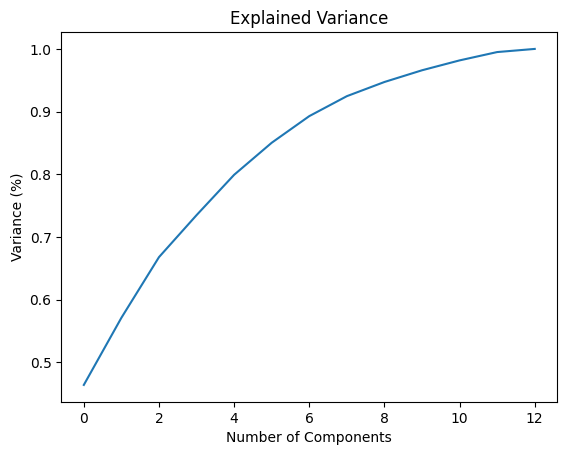

In [3]:
import matplotlib.pyplot as plt

pca = PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.show()

# Interpreting the Plot
### The plot illustrates that:

- The first few components account for a significant portion of the variance.
- The curve starts to plateau around the 8th component, suggesting diminishing returns on explained variance after this point.

The number of Cs will be decided by the Knee/Elbow Method:

Knee/Elbow Method: Look for a "knee" in the plot, which typically represents a point beyond which the marginal gain in explained variance decreases sharply. In this plot, this knee appears to be around the 8th C.

In [4]:
# Apply PCA
pca = PCA(n_components=8)  # n_components specifies the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Convert to a DataFrame for easier viewing
X_pca_df = pd.DataFrame(data=X_pca, columns=[
    'P C 1', 'P C 2',
    'P C 3', 'P C 4',
    'P C 5', 'P C 6',
    'P C 7', 'P C 8'
])

# Print the variance explained by the first two components
print("Explained variance by component: %s" % pca.explained_variance_ratio_)

# Display the first few entries of the transformed data
print(X_pca_df.head())

Explained variance by component: [0.46383049 0.10715436 0.09675558 0.06701901 0.06436643 0.0511442
 0.04249544 0.03184095]
      P C 1     P C 2     P C 3     P C 4     P C 5     P C 6     P C 7  \
0 -2.122202  0.743664  0.355450 -1.013829  0.090091  0.314011  0.277459   
1 -1.468893  0.592887 -0.703958 -0.377202 -0.327916 -0.223345  0.598355   
2 -2.092354  0.593596  0.153062 -0.355654 -1.125647 -0.441584  0.561936   
3 -2.635070 -0.015014 -0.129632  0.083504 -1.150820 -0.626124  0.710692   
4 -2.158231  0.017378 -0.391436 -0.064461 -0.688321 -0.562235  0.916288   

      P C 8  
0 -0.269321  
1  0.207751  
2 -0.149975  
3 -0.296431  
4  0.524446  


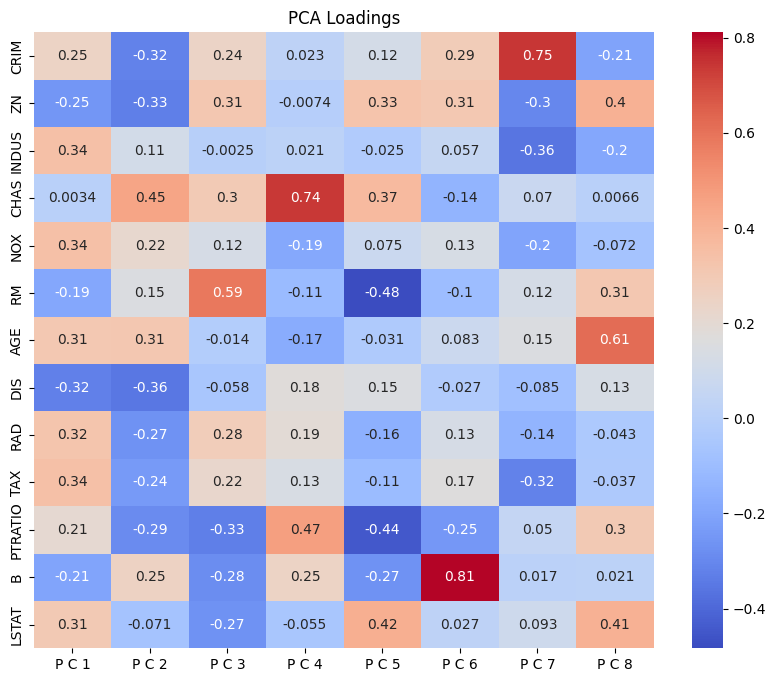

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame of the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=X_pca_df.columns, index=X.columns)

# Plotting the heatmap of PCA loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.show()


# Interpretation of the 8 principal components extracted

## Principal Component 1 (PC1)

Strong Contributions: NOX (0.34), TAX (0.34), INDUS (0.34)
Interpretation: PC1 seems to heavily involve features related to urban development intensity and environmental factors. High loadings on NOX and TAX suggest this component reflects areas with industrial activity and higher taxation likely due to urban settings.

## Principal Component 2 (PC2)
Strong Contributions: DIS (-0.36), AGE (0.31)
Interpretation: PC2 contrasts between accessibility to employment centers (DIS) and age of the dwelling (AGE). Negative loading on DIS and positive on AGE suggest this component represents older, less accessible areas.

## Principal Component 3 (PC3)
Strong Contributions: CHAS (0.74)
Interpretation: This component is predominantly influenced by the Charles River dummy variable (CHAS), indicating whether the tract bounds the river. This suggests PC3 captures variance mainly related to proximity to the river.

## Principal Component 4 (PC4)
Strong Contributions: NOX (-0.19), RM (0.59)
Interpretation: PC4 features a strong positive loading on RM (average number of rooms per dwelling) and a negative on NOX (nitric oxides concentration), highlighting areas that are residential with larger homes but lower pollution levels.

## Principal Component 5 (PC5)
Strong Contributions: CHAS (0.37), B (-0.44)
Interpretation: With a moderate loading on CHAS and a strong negative on B (proportion of Blacks by town), PC5 might represent racial demographic contrasts in relation to river proximity.

## Principal Component 6 (PC6)
Strong Contributions: AGE (0.61)
Interpretation: Dominated by AGE, this component represents older dwellings, capturing the variance related to the age of properties.

## Principal Component 7 (PC7)
Strong Contributions: LSTAT (0.81)
Interpretation: LSTAT, representing the percentage of lower status of the population, dominates PC7. This component essentially captures socio-economic status variations within the dataset.

## Principal Component 8 (PC8)
Strong Contributions: B (0.30), ZN (0.40)
Interpretation: PC8 has positive loadings on B and ZN (proportion of residential land zoned for lots over 25,000 sq.ft.). This suggests it represents areas that are residential with higher racial diversity and larger property sizes.

# Linear Regression Algorithm

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 29.18894916166759
R-squared: 0.6019713165778662


# Worst results